Enter commodity prices separated by space: 1 2 34 5 67 11 22

Final Profit – Agent A: -53.0
Final Profit – Agent B: 73.0
Winner: Agent B


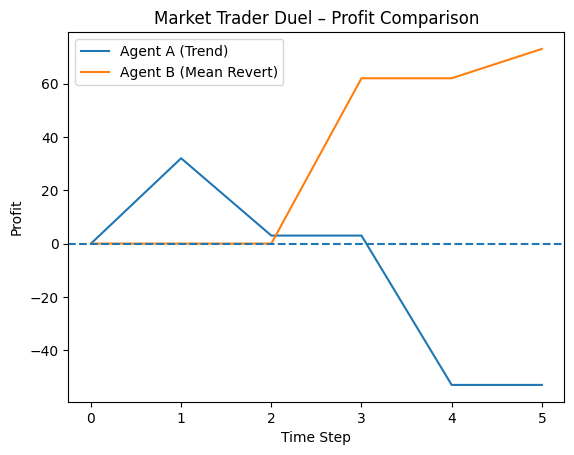

In [ ]:
"""
-----------------------------------------------------------------------
MARKET TRADER DUEL – AI Trading Agents (Short & Simple Version)
-----------------------------------------------------------------------
Input:
User enters commodity prices separated by space.
Example: 100 102 104 99 97 101 105

Logic:
Agent A (Trend Follower)  → Buy on uptrend, Sell on downtrend.
Agent B (Mean Reversion)  → Buy when price is cheap vs last 5 avg,
                            Sell when expensive.

Output:
Profit chart and final winner.
-----------------------------------------------------------------------
"""

import matplotlib.pyplot as plt

# ---------------- USER INPUT -----------------
prices = list(map(float, input("Enter commodity prices separated by space: ").split()))
T = len(prices)

cashA = cashB = 1000.0
posA = posB = 0
profitA, profitB = [], []

# ---------------- TRADING LOOP ----------------
for t in range(1, T):
    p = prices[t]

    # ----- Agent A (Trend Strategy) -----
    if prices[t] > prices[t-1] and posA == 0:  # buy
        cashA -= p; posA = 1
    elif prices[t] < prices[t-1] and posA == 1:  # sell
        cashA += p; posA = 0

    # ----- Agent B (Mean Reversion) -----
    avg = sum(prices[max(0,t-5):t]) / len(prices[max(0,t-5):t])
    if p < avg and posB == 0:  # buy cheap
        cashB -= p; posB = 1
    elif p > avg and posB == 1:  # sell expensive
        cashB += p; posB = 0

    # portfolio value = cash + holding * price
    profitA.append(cashA + posA * p - 1000)
    profitB.append(cashB + posB * p - 1000)

# ---------------- OUTPUT ----------------
print("\nFinal Profit – Agent A:", round(profitA[-1], 2))
print("Final Profit – Agent B:", round(profitB[-1], 2))
print("Winner:", "Agent A" if profitA[-1] > profitB[-1] else "Agent B" if profitB[-1] > profitA[-1] else "Draw")

plt.plot(profitA, label="Agent A (Trend)")
plt.plot(profitB, label="Agent B (Mean Revert)")
plt.axhline(0, linestyle="--")
plt.xlabel("Time Step")
plt.ylabel("Profit")
plt.title("Market Trader Duel – Profit Comparison")
plt.legend()
plt.show()
